# Workshop Area and Archive

### AlBERT

In [ ]:
# Load the model and its tokenizer

from transformers import AlbertTokenizerFast
from cockatiel import CustomAlbertForSequenceClassification, batch_predict, batcher, tokenize

tokenizer = AlbertTokenizerFast.from_pretrained("Ibrahim-Alam/finetuning-albert-base-v2-on-imdb")
model = CustomAlbertForSequenceClassification.from_pretrained("Ibrahim-Alam/finetuning-albert-base-v2-on-imdb").to(device)

# Put model into evaluation mode
model = model.eval()



# View model summary

import torchsummary as ts

print(ts.summary(model).total_params)



# Make predictions on some samples
y_pred, labels = batch_predict(model.forward, tokenizer, data_np[:100], batch_size, device)

# Compute the activations on which to apply the NMF
features, labels = batch_predict(model.features, tokenizer, data_np[:100], batch_size, device)

# Go from these activations to the final prediction
y_pred_bis = model.end_model(features)

print("\nAccuracy for classic model        :", torch.mean((torch.argmax(y_pred, -1) == labels.to(device)).float()))
print("Accuracy for model in 'two parts' :", torch.mean((torch.argmax(y_pred_bis, -1) == labels.to(device)).float()))

#### Train COCKATIEL

In [ ]:
# # Veri kümesindeki ilk 20K'yı tahminletiyor

# positive_reviews = []
# negative_reviews = []

# with torch.no_grad():
#     for input_batch in batcher(data_np[:20000], batch_size=batch_size):
        
#         r = np.array(list(map(lambda z: z[0], input_batch)))

#         tokenized_batch = tokenize(r, tokenizer, device)
        
#         preds = model(**tokenized_batch)
        
#         positive_reviews.extend(list(input_batch[np.where(np.argmax(preds.cpu().numpy(), axis=1) == 1)[0]]))
#         negative_reviews.extend(list(input_batch[np.where(np.argmax(preds.cpu().numpy(), axis=1) == 0)[0]]))

# raw_dataset_pos = list(map(lambda z: z[0], positive_reviews))
# raw_dataset_neg = list(map(lambda z: z[0], negative_reviews))

# import pickle

# pickle.dump(raw_dataset_pos, open(parent_path + "raw_dataset_pos.pkl", "wb"))
# pickle.dump(raw_dataset_neg, open(parent_path + "raw_dataset_neg.pkl", "wb"))



# # Extract the excerpts as a dataset
  
# excerpt_dataset_pos = extract_excerpts(raw_dataset_pos)
# excerpt_dataset_neg = extract_excerpts(raw_dataset_neg)

# print(len(excerpt_dataset_pos), ' positives excerpts created.')
# print(len(excerpt_dataset_neg), ' negatives excerpts created.')

# pickle.dump(excerpt_dataset_pos, open(parent_path + "excerpt_dataset_pos.pkl", "wb"))
# pickle.dump(excerpt_dataset_neg, open(parent_path + "excerpt_dataset_neg.pkl", "wb"))



# # Train COCKATIEL

# with torch.no_grad():
    
#     cockatiel_explainer_pos = COCKATIEL(model, tokenizer, components=20, 
#                                         batch_size=batch_size, device=device)
#     # batch size was 64 
#     segments_pos, u_segments_pos, factorization_pos, global_importance_pos = cockatiel_explainer_pos.extract_concepts(excerpt_dataset_pos[:n_excerpts], 
#                                                                                                                       raw_dataset_pos[:(n_excerpts//10)], 
#                                                                                                                       1, limit_sobol=1_000)
    
# pickle.dump(segments_pos, open(parent_path + "segments_pos.pkl", "wb"))
# pickle.dump(u_segments_pos, open(parent_path + "u_segments_pos.pkl", "wb"))
# pickle.dump(factorization_pos, open(parent_path + "factorization_pos.pkl", "wb"))
# pickle.dump(global_importance_pos, open(parent_path + "global_importance_pos.pkl", "wb"))

# with torch.no_grad():
    
#     cockatiel_explainer_neg = COCKATIEL(model, tokenizer, components=20, 
#                                         batch_size=batch_size, device=device)
    
#     segments_neg, u_segments_neg, factorization_neg, global_importance_neg = cockatiel_explainer_neg.extract_concepts(excerpt_dataset_neg[:n_excerpts], 
#                                                                                             raw_dataset_neg[:(n_excerpts//10)], 
#                                                                                             0, limit_sobol=1_000)
    
# pickle.dump(segments_neg, open(parent_path + "segments_neg.pkl", "wb"))
# pickle.dump(u_segments_neg, open(parent_path + "u_segments_neg.pkl", "wb"))
# pickle.dump(factorization_neg, open(parent_path + "factorization_neg.pkl", "wb"))
# pickle.dump(global_importance_neg, open(parent_path + "global_importance_neg.pkl", "wb"))

#### Run Directly

In [ ]:
import pickle

# Load raw dataset and excerpts

raw_dataset_pos = pickle.load(open(parent_path + "raw_dataset_pos.pkl", "rb"))
raw_dataset_neg = pickle.load(open(parent_path + "raw_dataset_neg.pkl", "rb"))
excerpt_dataset_pos = pickle.load(open(parent_path + "excerpt_dataset_pos.pkl", "rb"))
excerpt_dataset_neg = pickle.load(open(parent_path + "excerpt_dataset_neg.pkl", "rb"))

# Load sentences and global importances for positive class

segments_pos = pickle.load(open(parent_path + "segments_pos.pkl",'rb'))
u_segments_pos = pickle.load(open(parent_path + "u_segments_pos.pkl",'rb'))
factorization_pos = pickle.load(open(parent_path + "factorization_pos.pkl",'rb'))
global_importance_pos = pickle.load(open(parent_path + "global_importance_pos.pkl",'rb'))

# Load sentences and global importances for negative class

segments_neg = pickle.load(open(parent_path + "segments_neg.pkl",'rb'))
u_segments_neg = pickle.load(open(parent_path + "u_segments_neg.pkl",'rb'))
factorization_neg = pickle.load(open(parent_path + "factorization_neg.pkl",'rb'))
global_importance_neg = pickle.load(open(parent_path + "global_importance_neg.pkl",'rb'))

In [ ]:
plot_glob_importances(global_importance_pos, global_importance_neg)

In [ ]:
plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=False)

In [ ]:
plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=True, samples_to_test=[reviews_neg, reviews_pos])

### DistilBERT

In [ ]:
# Load the model and its tokenizer

from transformers import DistilBertTokenizerFast
from cockatiel import CustomDistilbertForSequenceClassification, batch_predict, batcher, tokenize

tokenizer = DistilBertTokenizerFast.from_pretrained("federicopascual/finetuned-sentiment-analysis-model")
model = CustomDistilbertForSequenceClassification.from_pretrained("federicopascual/finetuned-sentiment-analysis-model").to(device)

# Put model into evaluation mode
model = model.eval()



# View model summary

import torchsummary as ts

print(ts.summary(model).total_params)



# Make predictions on some samples
y_pred, labels = batch_predict(model.forward, tokenizer, data_np[:100], batch_size, device)

# Compute the activations on which to apply the NMF
features, labels = batch_predict(model.features, tokenizer, data_np[:100], batch_size, device)

# Go from these activations to the final prediction
y_pred_bis = model.end_model(features)

print("\nAccuracy for classic model        :", torch.mean((torch.argmax(y_pred, -1) == labels.to(device)).float()))
print("Accuracy for model in 'two parts' :", torch.mean((torch.argmax(y_pred_bis, -1) == labels.to(device)).float()))

#### Train COCKATIEL

In [ ]:
# # Veri kümesindeki ilk 20K'yı tahminletiyor

# positive_reviews = []
# negative_reviews = []

# with torch.no_grad():
#     for input_batch in batcher(data_np[:20000], batch_size=batch_size):
        
#         r = np.array(list(map(lambda z: z[0], input_batch)))

#         tokenized_batch = tokenize(r, tokenizer, device)
        
#         preds = model(**tokenized_batch)
        
#         positive_reviews.extend(list(input_batch[np.where(np.argmax(preds.cpu().numpy(), axis=1) == 1)[0]]))
#         negative_reviews.extend(list(input_batch[np.where(np.argmax(preds.cpu().numpy(), axis=1) == 0)[0]]))

# raw_dataset_pos = list(map(lambda z: z[0], positive_reviews))
# raw_dataset_neg = list(map(lambda z: z[0], negative_reviews))

# import pickle

# pickle.dump(raw_dataset_pos, open(parent_path + "raw_dataset_pos.pkl", "wb"))
# pickle.dump(raw_dataset_neg, open(parent_path + "raw_dataset_neg.pkl", "wb"))



# # Extract the excerpts as a dataset
  
# excerpt_dataset_pos = extract_excerpts(raw_dataset_pos)
# excerpt_dataset_neg = extract_excerpts(raw_dataset_neg)

# print(len(excerpt_dataset_pos), ' positives excerpts created.')
# print(len(excerpt_dataset_neg), ' negatives excerpts created.')

# pickle.dump(excerpt_dataset_pos, open(parent_path + "excerpt_dataset_pos.pkl", "wb"))
# pickle.dump(excerpt_dataset_neg, open(parent_path + "excerpt_dataset_neg.pkl", "wb"))



# # Train COCKATIEL

# with torch.no_grad():
    
#     cockatiel_explainer_pos = COCKATIEL(model, tokenizer, components=20, 
#                                         batch_size=batch_size, device=device)
#     # batch size was 64 
#     segments_pos, u_segments_pos, factorization_pos, global_importance_pos = cockatiel_explainer_pos.extract_concepts(excerpt_dataset_pos[:n_excerpts], 
#                                                                                                                       raw_dataset_pos[:(n_excerpts//10)], 
#                                                                                                                       1, limit_sobol=1_000)
    
# pickle.dump(segments_pos, open(parent_path + "segments_pos.pkl", "wb"))
# pickle.dump(u_segments_pos, open(parent_path + "u_segments_pos.pkl", "wb"))
# pickle.dump(factorization_pos, open(parent_path + "factorization_pos.pkl", "wb"))
# pickle.dump(global_importance_pos, open(parent_path + "global_importance_pos.pkl", "wb"))

# with torch.no_grad():
    
#     cockatiel_explainer_neg = COCKATIEL(model, tokenizer, components=20, 
#                                         batch_size=batch_size, device=device)
    
#     segments_neg, u_segments_neg, factorization_neg, global_importance_neg = cockatiel_explainer_neg.extract_concepts(excerpt_dataset_neg[:n_excerpts], 
#                                                                                             raw_dataset_neg[:(n_excerpts//10)], 
#                                                                                             0, limit_sobol=1_000)
    
# pickle.dump(segments_neg, open(parent_path + "segments_neg.pkl", "wb"))
# pickle.dump(u_segments_neg, open(parent_path + "u_segments_neg.pkl", "wb"))
# pickle.dump(factorization_neg, open(parent_path + "factorization_neg.pkl", "wb"))
# pickle.dump(global_importance_neg, open(parent_path + "global_importance_neg.pkl", "wb"))

#### Run Directly

In [ ]:
import pickle

# Load raw dataset and excerpts

raw_dataset_pos = pickle.load(open(parent_path + "raw_dataset_pos.pkl", "rb"))
raw_dataset_neg = pickle.load(open(parent_path + "raw_dataset_neg.pkl", "rb"))
excerpt_dataset_pos = pickle.load(open(parent_path + "excerpt_dataset_pos.pkl", "rb"))
excerpt_dataset_neg = pickle.load(open(parent_path + "excerpt_dataset_neg.pkl", "rb"))

# Load sentences and global importances for positive class

segments_pos = pickle.load(open(parent_path + "segments_pos.pkl",'rb'))
u_segments_pos = pickle.load(open(parent_path + "u_segments_pos.pkl",'rb'))
factorization_pos = pickle.load(open(parent_path + "factorization_pos.pkl",'rb'))
global_importance_pos = pickle.load(open(parent_path + "global_importance_pos.pkl",'rb'))

# Load sentences and global importances for negative class

segments_neg = pickle.load(open(parent_path + "segments_neg.pkl",'rb'))
u_segments_neg = pickle.load(open(parent_path + "u_segments_neg.pkl",'rb'))
factorization_neg = pickle.load(open(parent_path + "factorization_neg.pkl",'rb'))
global_importance_neg = pickle.load(open(parent_path + "global_importance_neg.pkl",'rb'))

In [ ]:
plot_glob_importances(global_importance_pos, global_importance_neg)

In [ ]:
plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=False)

In [ ]:
plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=True, samples_to_test=[reviews_neg, reviews_pos])

### Orinial Paper's Sentences

In [18]:
# ###### the killings are stupid and / or unimaginative bulamadım

# substring = "unimaginative"

# for index, string in enumerate(segments_neg):
#     if substring in string:
#         print(f"Substring '{substring}' found in string at index {index}: {string}")

In [19]:
# indices_neg = [35253, 29729, 35285, 14800, 14720, 31318, 15747]
# reviews_neg = np.array(segments_neg)[indices_neg]
# print(reviews_neg)

# indices_pos = [10108, 15711, 24157, 4142, 8211, 16541, 31384, 39364]
# reviews_pos = np.array(segments_pos)[indices_pos]
# print(reviews_pos)

### Results (Trained on 25K test set)

In [32]:
# import pickle

# # Load raw dataset and excerpts

# parent_path = "data/huggingface_test/"

# raw_dataset_pos = pickle.load(open(parent_path + "raw_dataset_pos.pkl", "rb"))
# raw_dataset_neg = pickle.load(open(parent_path + "raw_dataset_neg.pkl", "rb"))
# excerpt_dataset_pos = pickle.load(open(parent_path + "excerpt_dataset_pos.pkl", "rb"))
# excerpt_dataset_neg = pickle.load(open(parent_path + "excerpt_dataset_neg.pkl", "rb"))

# # Load sentences and global importances for positive class

# segments_pos = pickle.load(open(parent_path + "segments_pos.pkl",'rb'))
# u_segments_pos = pickle.load(open(parent_path + "u_segments_pos.pkl",'rb'))
# factorization_pos = pickle.load(open(parent_path + "factorization_pos.pkl",'rb'))
# global_importance_pos = pickle.load(open(parent_path + "global_importance_pos.pkl",'rb'))

# # Load sentences and global importances for negative class

# segments_neg = pickle.load(open(parent_path + "segments_neg.pkl",'rb'))
# u_segments_neg = pickle.load(open(parent_path + "u_segments_neg.pkl",'rb'))
# factorization_neg = pickle.load(open(parent_path + "factorization_neg.pkl",'rb'))
# global_importance_neg = pickle.load(open(parent_path + "global_importance_neg.pkl",'rb'))

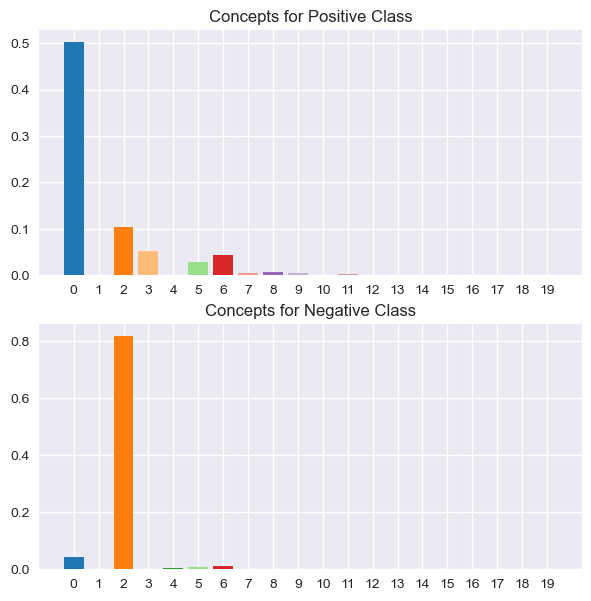

In [33]:
plot_glob_importances(global_importance_pos, global_importance_neg)

In [43]:
plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=False)

positive predicted reviews:




10 most important reviews for positive predicted label - concept1:






10 most important reviews for positive predicted label - concept2:






negative predicted reviews:




10 most important reviews for negative predicted label - concept1:






10 most important reviews for negative predicted label - concept2:






10 most important reviews for negative predicted label - concept3:




In [44]:
reviews_neg_text = [
    "I couldn't even follow the plot, but suffice it to say, this is the absolute worst movie I have ever seen in my life.",
    "This is by far one of the worst films I've ever paid good money to see.",
    'Words cannot begin to describe how blandly terrible this movie is.',
    "It's pointless.",
    'Plot is unimportant.',
    'About the only good thing about this is the setting.',
    "It's too bad because this film had great production values and a good cast, but isn't the idea of turning a book into a movie (TV or film) to get the people who read the book to be part of the audience."
]

reviews_neg = [[text, 'negative'] for text in reviews_neg_text]
reviews_neg = np.array(reviews_neg)

reviews_pos_text = [
    'One of the best movies ever, hands down.',
    'It is simply one of my all-time favorite films.',
    'Very inspiring and encouraging to all ages.',
    'The ballroom scenes were very nice, the dancing and the outfits looked beautiful.',
    "Billy Bitzer's camera work is quite good.",
    'The humor and sadness are subtly blended.',
    'Idrissa Oudraogo ( Burkina Faso ): from one of the poorest country in the world, a tender and funny story about five boys who want to capture Osama Bin Laden.',
    'Especially fun is the performance by Cronenberg as the truly evil human doctor who is bent on destroying the Nightbreed.'
]

reviews_pos = [[text, 'positive'] for text in reviews_pos_text]
reviews_pos = np.array(reviews_pos)

plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=True, samples_to_test=[reviews_neg, reviews_pos])

### Weird Results

#### Load Files (No Train)

In [28]:
# parent_path = "data/regularization_l1_1/"

In [29]:
import pickle

# Load raw dataset and excerpts

# raw_dataset_pos = pickle.load(open(parent_path + "raw_dataset_pos.pkl", "rb"))
# raw_dataset_neg = pickle.load(open(parent_path + "raw_dataset_neg.pkl", "rb"))
# excerpt_dataset_pos = pickle.load(open(parent_path + "excerpt_dataset_pos.pkl", "rb"))
# excerpt_dataset_neg = pickle.load(open(parent_path + "excerpt_dataset_neg.pkl", "rb"))

# Load sentences and global importances for positive class

# segments_pos = pickle.load(open(parent_path + "segments_pos.pkl",'rb'))
# u_segments_pos = pickle.load(open(parent_path + "u_segments_pos.pkl",'rb'))
# factorization_pos = pickle.load(open(parent_path + "factorization_pos.pkl",'rb'))
# global_importance_pos = pickle.load(open(parent_path + "global_importance_pos.pkl",'rb'))

# # Load sentences and global importances for negative class

# segments_neg = pickle.load(open(parent_path + "segments_neg.pkl",'rb'))
# u_segments_neg = pickle.load(open(parent_path + "u_segments_neg.pkl",'rb'))
# factorization_neg = pickle.load(open(parent_path + "factorization_neg.pkl",'rb'))
# global_importance_neg = pickle.load(open(parent_path + "global_importance_neg.pkl",'rb'))

#### Results (original)

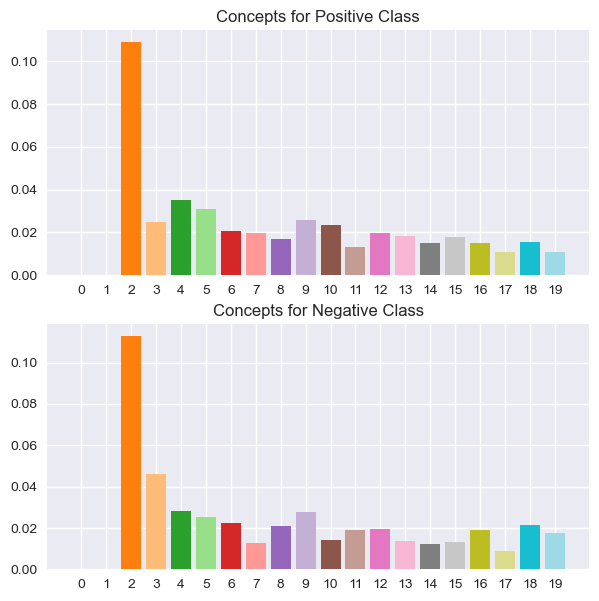

In [34]:
plot_glob_importances(global_importance_pos, global_importance_neg)

In [35]:
plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=False)

positive predicted reviews:




10 most important reviews for positive predicted label - concept1:






10 most important reviews for positive predicted label - concept2:






10 most important reviews for positive predicted label - concept3:






negative predicted reviews:




10 most important reviews for negative predicted label - concept1:






10 most important reviews for negative predicted label - concept2:






10 most important reviews for negative predicted label - concept3:




In [36]:
reviews_neg_text = [
    "I couldn't even follow the plot, but suffice it to say, this is the absolute worst movie I have ever seen in my life.",
    "This is by far one of the worst films I've ever paid good money to see.",
    'Words cannot begin to describe how blandly terrible this movie is.',
    "It's pointless.",
    'Plot is unimportant.',
    'About the only good thing about this is the setting.',
    "It's too bad because this film had great production values and a good cast, but isn't the idea of turning a book into a movie (TV or film) to get the people who read the book to be part of the audience."
]

reviews_neg = [[text, 'negative'] for text in reviews_neg_text]
reviews_neg = np.array(reviews_neg)

reviews_pos_text = [
    'One of the best movies ever, hands down.',
    'It is simply one of my all-time favorite films.',
    'Very inspiring and encouraging to all ages.',
    'The ballroom scenes were very nice, the dancing and the outfits looked beautiful.',
    "Billy Bitzer's camera work is quite good.",
    'The humor and sadness are subtly blended.',
    'Idrissa Oudraogo ( Burkina Faso ): from one of the poorest country in the world, a tender and funny story about five boys who want to capture Osama Bin Laden.',
    'Especially fun is the performance by Cronenberg as the truly evil human doctor who is bent on destroying the Nightbreed.'
]

reviews_pos = [[text, 'positive'] for text in reviews_pos_text]
reviews_pos = np.array(reviews_pos)

plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=True, samples_to_test=[reviews_neg_text, reviews_pos_text])

### Sentence Level

In [27]:
plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=True, samples_to_test=[reviews_neg_text, reviews_pos_text], extract_fct='sentence')

### Closer Result (aw=0.0001, l1=1)

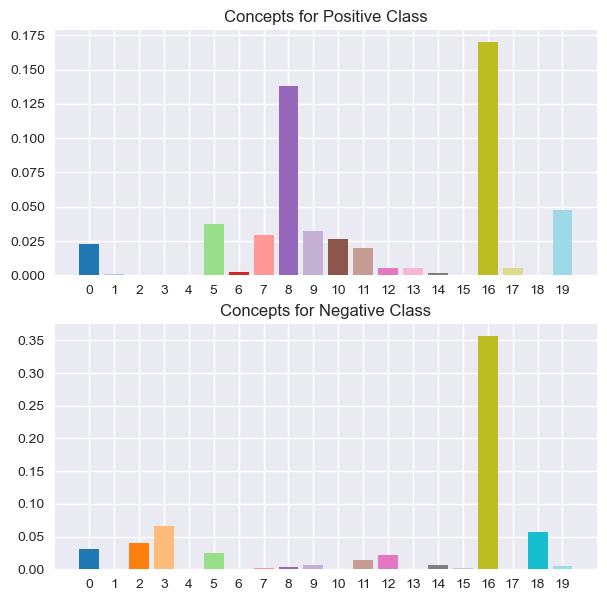

In [31]:
plot_glob_importances(global_importance_pos, global_importance_neg)

In [35]:
plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=False)

positive predicted reviews:




10 most important reviews for positive predicted label - concept1:






10 most important reviews for positive predicted label - concept2:






10 most important reviews for positive predicted label - concept3:






negative predicted reviews:




10 most important reviews for negative predicted label - concept1:






10 most important reviews for negative predicted label - concept2:






10 most important reviews for negative predicted label - concept3:




In [33]:
reviews_neg_text = [
    "I couldn't even follow the plot, but suffice it to say, this is the absolute worst movie I have ever seen in my life.",
    "This is by far one of the worst films I've ever paid good money to see.",
    'Words cannot begin to describe how blandly terrible this movie is.',
    "It's pointless.",
    'Plot is unimportant.',
    'About the only good thing about this is the setting.',
    "It's too bad because this film had great production values and a good cast, but isn't the idea of turning a book into a movie (TV or film) to get the people who read the book to be part of the audience."
]

reviews_neg = [[text, 'negative'] for text in reviews_neg_text]
reviews_neg = np.array(reviews_neg)

reviews_pos_text = [
    'One of the best movies ever, hands down.',
    'It is simply one of my all-time favorite films.',
    'Very inspiring and encouraging to all ages.',
    'The ballroom scenes were very nice, the dancing and the outfits looked beautiful.',
    "Billy Bitzer's camera work is quite good.",
    'The humor and sadness are subtly blended.',
    'Idrissa Oudraogo ( Burkina Faso ): from one of the poorest country in the world, a tender and funny story about five boys who want to capture Osama Bin Laden.',
    'Especially fun is the performance by Cronenberg as the truly evil human doctor who is bent on destroying the Nightbreed.'
]

reviews_pos = [[text, 'positive'] for text in reviews_pos_text]
reviews_pos = np.array(reviews_pos)

plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=True, samples_to_test=[reviews_neg_text, reviews_pos_text])

### Closer Results (aw=0.00005)

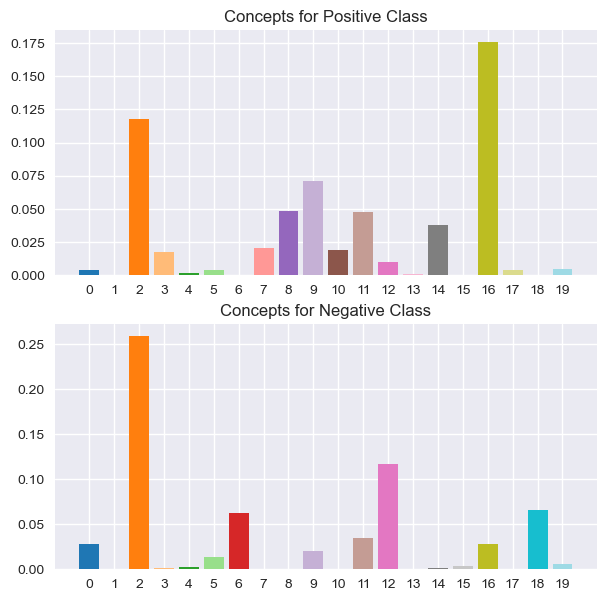

In [27]:
plot_glob_importances(global_importance_pos, global_importance_neg)

In [35]:
plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=False)

positive predicted reviews:




10 most important reviews for positive predicted label - concept1:






10 most important reviews for positive predicted label - concept2:






10 most important reviews for positive predicted label - concept3:






negative predicted reviews:




10 most important reviews for negative predicted label - concept1:






10 most important reviews for negative predicted label - concept2:






10 most important reviews for negative predicted label - concept3:




In [28]:
reviews_neg_text = [
    "I couldn't even follow the plot, but suffice it to say, this is the absolute worst movie I have ever seen in my life.",
    "This is by far one of the worst films I've ever paid good money to see.",
    'Words cannot begin to describe how blandly terrible this movie is.',
    "It's pointless.",
    'Plot is unimportant.',
    'About the only good thing about this is the setting.',
    "It's too bad because this film had great production values and a good cast, but isn't the idea of turning a book into a movie (TV or film) to get the people who read the book to be part of the audience."
]

reviews_neg = [[text, 'negative'] for text in reviews_neg_text]
reviews_neg = np.array(reviews_neg)

reviews_pos_text = [
    'One of the best movies ever, hands down.',
    'It is simply one of my all-time favorite films.',
    'Very inspiring and encouraging to all ages.',
    'The ballroom scenes were very nice, the dancing and the outfits looked beautiful.',
    "Billy Bitzer's camera work is quite good.",
    'The humor and sadness are subtly blended.',
    'Idrissa Oudraogo ( Burkina Faso ): from one of the poorest country in the world, a tender and funny story about five boys who want to capture Osama Bin Laden.',
    'Especially fun is the performance by Cronenberg as the truly evil human doctor who is bent on destroying the Nightbreed.'
]

reviews_pos = [[text, 'positive'] for text in reviews_pos_text]
reviews_pos = np.array(reviews_pos)

plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=True, samples_to_test=[reviews_neg_text, reviews_pos_text])

### Closer Results (aw=0.00001)

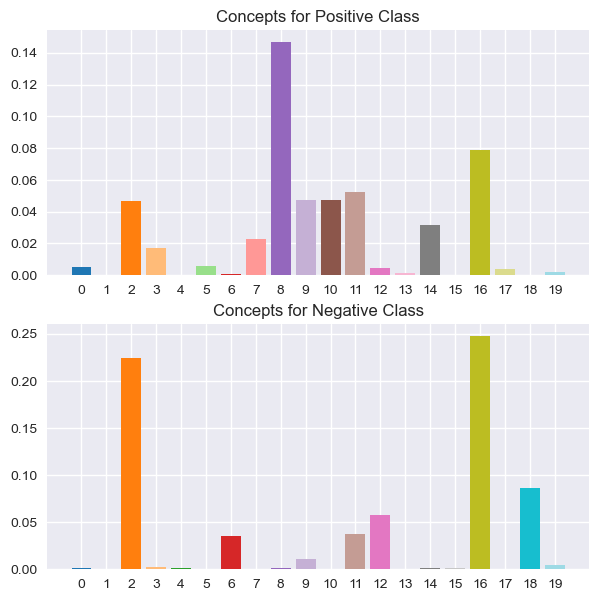

In [30]:
plot_glob_importances(global_importance_pos, global_importance_neg)

In [35]:
plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=False)

positive predicted reviews:




10 most important reviews for positive predicted label - concept1:






10 most important reviews for positive predicted label - concept2:






10 most important reviews for positive predicted label - concept3:






negative predicted reviews:




10 most important reviews for negative predicted label - concept1:






10 most important reviews for negative predicted label - concept2:






10 most important reviews for negative predicted label - concept3:




In [31]:
reviews_neg_text = [
    "I couldn't even follow the plot, but suffice it to say, this is the absolute worst movie I have ever seen in my life.",
    "This is by far one of the worst films I've ever paid good money to see.",
    'Words cannot begin to describe how blandly terrible this movie is.',
    "It's pointless.",
    'Plot is unimportant.',
    'About the only good thing about this is the setting.',
    "It's too bad because this film had great production values and a good cast, but isn't the idea of turning a book into a movie (TV or film) to get the people who read the book to be part of the audience."
]

reviews_neg = [[text, 'negative'] for text in reviews_neg_text]
reviews_neg = np.array(reviews_neg)

reviews_pos_text = [
    'One of the best movies ever, hands down.',
    'It is simply one of my all-time favorite films.',
    'Very inspiring and encouraging to all ages.',
    'The ballroom scenes were very nice, the dancing and the outfits looked beautiful.',
    "Billy Bitzer's camera work is quite good.",
    'The humor and sadness are subtly blended.',
    'Idrissa Oudraogo ( Burkina Faso ): from one of the poorest country in the world, a tender and funny story about five boys who want to capture Osama Bin Laden.',
    'Especially fun is the performance by Cronenberg as the truly evil human doctor who is bent on destroying the Nightbreed.'
]

reviews_pos = [[text, 'positive'] for text in reviews_pos_text]
reviews_pos = np.array(reviews_pos)

plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=True, samples_to_test=[reviews_neg_text, reviews_pos_text])

### Final Results (aw=0.000005)

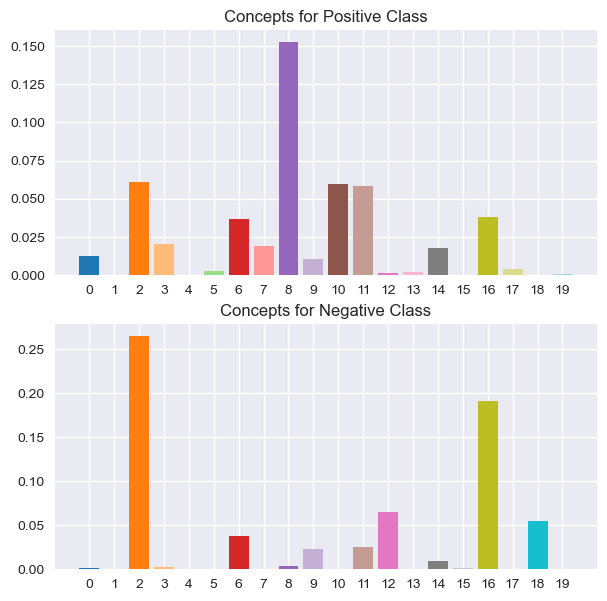

In [30]:
plot_glob_importances(global_importance_pos, global_importance_neg)

In [35]:
plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=False)

positive predicted reviews:




10 most important reviews for positive predicted label - concept1:






10 most important reviews for positive predicted label - concept2:






10 most important reviews for positive predicted label - concept3:






negative predicted reviews:




10 most important reviews for negative predicted label - concept1:






10 most important reviews for negative predicted label - concept2:






10 most important reviews for negative predicted label - concept3:




In [31]:
reviews_neg_text = [
    "I couldn't even follow the plot, but suffice it to say, this is the absolute worst movie I have ever seen in my life.",
    "This is by far one of the worst films I've ever paid good money to see.",
    'Words cannot begin to describe how blandly terrible this movie is.',
    "It's pointless.",
    'Plot is unimportant.',
    'About the only good thing about this is the setting.',
    "It's too bad because this film had great production values and a good cast, but isn't the idea of turning a book into a movie (TV or film) to get the people who read the book to be part of the audience."
]

reviews_neg = [[text, 'negative'] for text in reviews_neg_text]
reviews_neg = np.array(reviews_neg)

reviews_pos_text = [
    'One of the best movies ever, hands down.',
    'It is simply one of my all-time favorite films.',
    'Very inspiring and encouraging to all ages.',
    'The ballroom scenes were very nice, the dancing and the outfits looked beautiful.',
    "Billy Bitzer's camera work is quite good.",
    'The humor and sadness are subtly blended.',
    'Idrissa Oudraogo ( Burkina Faso ): from one of the poorest country in the world, a tender and funny story about five boys who want to capture Osama Bin Laden.',
    'Especially fun is the performance by Cronenberg as the truly evil human doctor who is bent on destroying the Nightbreed.'
]

reviews_pos = [[text, 'positive'] for text in reviews_pos_text]
reviews_pos = np.array(reviews_pos)

plot_reviews_exp(segments_pos, u_segments_pos, factorization_pos, global_importance_pos,
                 segments_neg, u_segments_neg, factorization_neg, global_importance_neg,
                 custom_samples=True, samples_to_test=[reviews_neg_text, reviews_pos_text])